# 12-752, Fall 2017: Assignment 4

## Task 1
How much memory is needed? Answer below:

*There are $2^{22}$ possible value for each sate, so the size of transition matrix should be $2^{22}\times2^{22}$. Each value in the matrix would requir 4 bytes of memory, so totally will be $4\times2^{22}\times2^{22}$ bytes of memory were needed. That is to say, we need $2^{46}$ bytes memory, which is approximately 70,369 GB. 
*

## Tasks 2, 3 and 4

For your convenience, $z_0$ and $x_0$ is sampled for you below. We also introduce two maps that map a state to an index and back.

In [352]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

map1 = {'0,0':0, '1,0':1, '0,1':2, '1,1':3}
map2 = {0:'0,0', 1:'1,0', 2:'0,1', 3:'1,1'}
states = ['0,0', '1,0', '0,1', '1,1']

mu = {'0,0':1, '1,0':50, '0,1':55, '1,1':105}
sigma = {'0,0':0.1, '1,0':5.1, '0,1':6.1, '1,1':11.1}

trans_prob = [[0.8, 0.19, 0.01, 0], [0.22, 0.6, 0, 0.18], [0.1, 0, 0.7, 0.2], [0, 0.13,0.5, 0.37]]
initial_prob = [0.25, 0.25, 0.25, 0.25]

'''
The map function makes accessing the trans_prob's easy:

Let's say you want p(z_t = (1,1) | z_t-1 = (0,1))
This is just:

trans_prob[map1['0,1']][map1['1,1']]
'''

#This is how you would sample the initial state
z = []
z.append(np.random.choice(states, p = initial_prob))

x = [np.random.normal(mu[z[-1]], sigma[z[-1]])]

print(z,x)

['0,1'] [52.36714463888711]


In [353]:
states[0]

'0,0'

Your solution goes below:

In [354]:
#Solution to task 2
x_value= x
p_xz = initial_prob[int(z[-1][0])] *  initial_prob[int(z[-1][2])]
P1 = np.zeros((4,100))
for i in range(100):
    prob2 = [trans_prob[map1[z[-1]]][map1['0,0']],trans_prob[map1[z[-1]]][map1['1,0']],
             trans_prob[map1[z[-1]]][map1['0,1']],trans_prob[map1[z[-1]]][map1['1,1']]]
    znew = np.random.choice(states,p = prob2)
    xnew = np.random.normal(mu[znew], sigma[znew])
    
    p_zzt = trans_prob[map1[z[-1]]][map1[znew]]
    p_xzt = scipy.stats.norm(mu[znew], sigma[znew]).pdf(xnew)
    p_xz = p_xz *p_zzt * p_xzt
    
    z.append(znew)
    x_value.append(xnew)

    sum_pxz = scipy.stats.norm(mu['0,0'], sigma['0,0']).pdf(xnew) \
    +scipy.stats.norm(mu['1,0'], sigma['1,0']).pdf(xnew)+ \
    scipy.stats.norm(mu['0,1'], sigma['0,1']).pdf(xnew)+ \
    scipy.stats.norm(mu['1,1'], sigma['1,1']).pdf(xnew)
    P1[0,i] = scipy.stats.norm(mu['0,0'], sigma['0,0']).pdf(xnew)/sum_pxz
    P1[1,i] = scipy.stats.norm(mu['1,0'], sigma['1,0']).pdf(xnew)/sum_pxz
    P1[2,i] = scipy.stats.norm(mu['0,1'], sigma['0,1']).pdf(xnew)/sum_pxz
    P1[3,i] = scipy.stats.norm(mu['1,1'], sigma['1,1']).pdf(xnew)/sum_pxz
    i = i+1
print(z)

['0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '1,1', '1,1', '0,1', '1,1', '1,1', '0,1', '0,1', '1,1', '0,1', '0,1', '1,1', '1,0', '1,1', '0,1', '0,1', '0,1', '1,1', '1,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '1,1', '1,1', '1,1', '0,1', '0,1', '1,1', '1,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,1', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,0', '0,1', '0,1', '0,1', '1,1', '1,0', '1,0', '1,0', '1,1', '1,1', '0,1', '0,1', '1,1', '1,1', '0,1', '0,0', '0,0', '1,0', '1,0', '0,0', '0,0', '1,0', '1,0', '0,0', '0,0', '1,0', '0,0', '1,0', '1,0', '1,1', '1,1', '1,1', '1,1', '0,1', '0,1', '1,1', '0,1', '0,1', '0,1', '0,1', '1,1', '1,1', '0,1', '0,0']


#### Task 3:

In [355]:
#Solution to task 3
print(p_xz)

3.39299458362e-147


Text(0,0.5,'Observed Power Values')

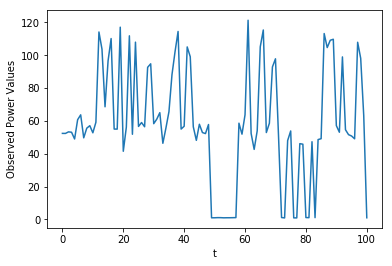

In [356]:
#Solution to task 4
plt.plot(x_value)
plt.xlabel("t")
plt.ylabel("Observed Power Values")

## Task 5

Compute the P1 matrix.


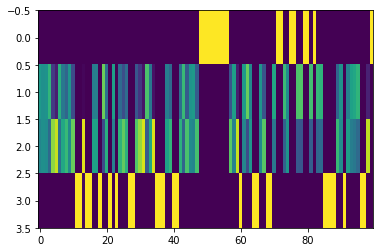

In [357]:
# Your solution here:
len(P1)
# You may want to visualize your matrix as follows:
plt.imshow(P1, aspect='auto', interpolation='nearest')

## Tasks 6, 7, 8 and 9

Computing P2, P3 and comparing to the ground truth.


In [358]:
## Your code goes here
def pzxtS1 (newx, pz):
    sum_right = [0,0,0,0]
    pz2=[0,0,0,0]
    for i in range(4):
        sum_right[0] = sum_right[0] + trans_prob[map1[states[i]]][map1[states[0]]]*pz[i]
        sum_right[1] = sum_right[1] + trans_prob[map1[states[i]]][map1[states[1]]]*pz[i]
        sum_right[2] = sum_right[2] + trans_prob[map1[states[i]]][map1[states[2]]]*pz[i]
        sum_right[3] = sum_right[3] + trans_prob[map1[states[i]]][map1[states[3]]]*pz[i]
    pz2[0] = scipy.stats.norm(mu[states[0]], sigma[states[0]]).pdf(newx)*sum_right[0]
    pz2[1] = scipy.stats.norm(mu[states[1]], sigma[states[1]]).pdf(newx)*sum_right[1]
    pz2[2] = scipy.stats.norm(mu[states[2]], sigma[states[2]]).pdf(newx)*sum_right[2]
    pz2[3] = scipy.stats.norm(mu[states[3]], sigma[states[3]]).pdf(newx)*sum_right[3]
    return pz2 

In [359]:
pz0 = [[scipy.stats.norm(mu[states[0]], sigma[states[0]]).pdf(x_value[0])*0.25,
        scipy.stats.norm(mu[states[1]], sigma[states[1]]).pdf(x_value[0])*0.25,
        scipy.stats.norm(mu[states[2]], sigma[states[2]]).pdf(x_value[0])*0.25,
        scipy.stats.norm(mu[states[3]], sigma[states[3]]).pdf(x_value[0])*0.25]]
for i in range(100):
    pz0.append(pzxtS1(x_value[i+1],pz0[-1]))

In [360]:
P2 = np.matrix(pz0).T

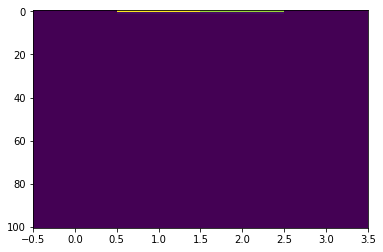

In [361]:
plt.imshow(np.array(P2).T, aspect='auto', interpolation='nearest')
# Note that this is P2, non-normalized probabilities.

### Task 7:

In [362]:
sum_column = P2.sum(axis=0).T
P3 = np.zeros((4,len(sum_column)))
for i in range(len(sum_column)):
    P3[0,i] = float(P2[0,i]/sum_column[i])
    P3[1,i] = P2[1,i]/sum_column[i]
    P3[2,i] = float(P2[2,i]/sum_column[i])
    P3[3,i] = float(P2[3,i]/sum_column[i])

### Task 8:

Text(0.5,1,'P1')

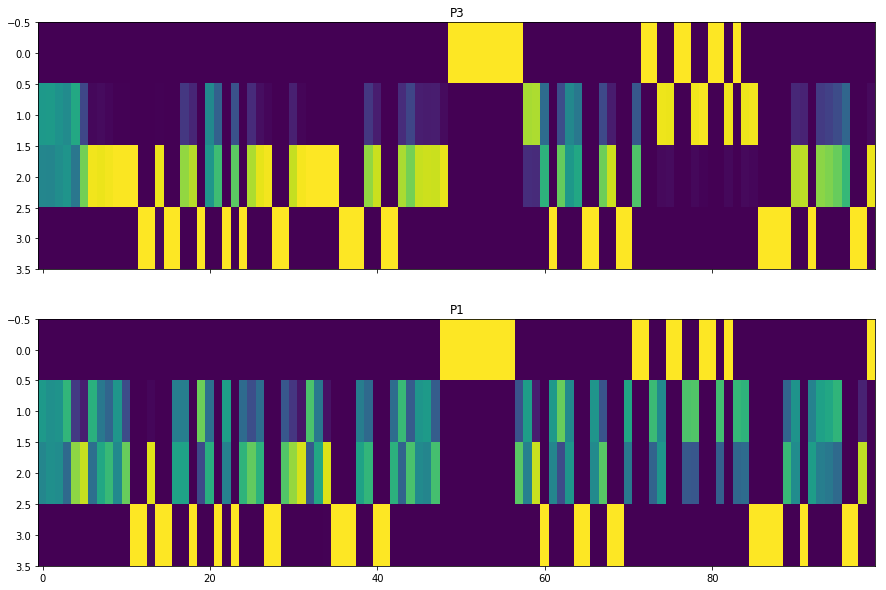

In [363]:
f, axarr = plt.subplots(2, sharex=True,figsize=(15,10))
axarr[0].imshow(np.array(P3), aspect='auto', interpolation='nearest')
axarr[0].set_title('P3')
axarr[1].imshow(np.array(P1), aspect='auto', interpolation='nearest')
axarr[1].set_title('P1')

Text(0.5,1,'P0')

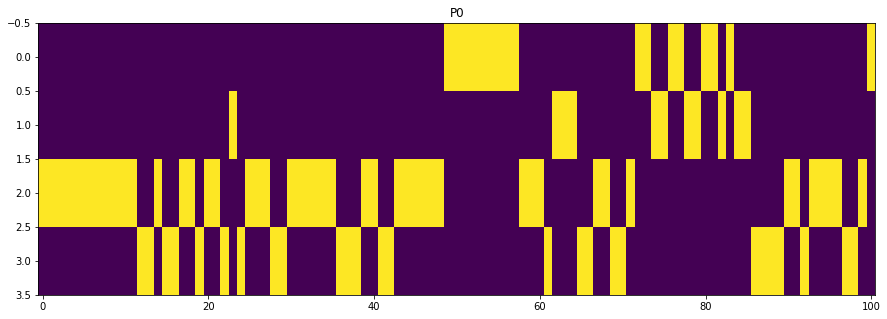

In [364]:
#P0 = []

## Your code goes here
P0 = np.zeros((4,len(z)))
for i in range(len(z)):
    P0[0,i] = 1 * int(z[i] == states[0])
    P0[1,i] = 1 * int(z[i] == states[1])
    P0[2,i] = 1 * int(z[i] == states[2])
    P0[3,i] = 1 * int(z[i] == states[3])
plt.figure(figsize=(15,5))
plt.imshow(np.array(P0), aspect='auto', interpolation='nearest')
plt.title("P0")

### Task 9:

Text(0.5,1,'P0')

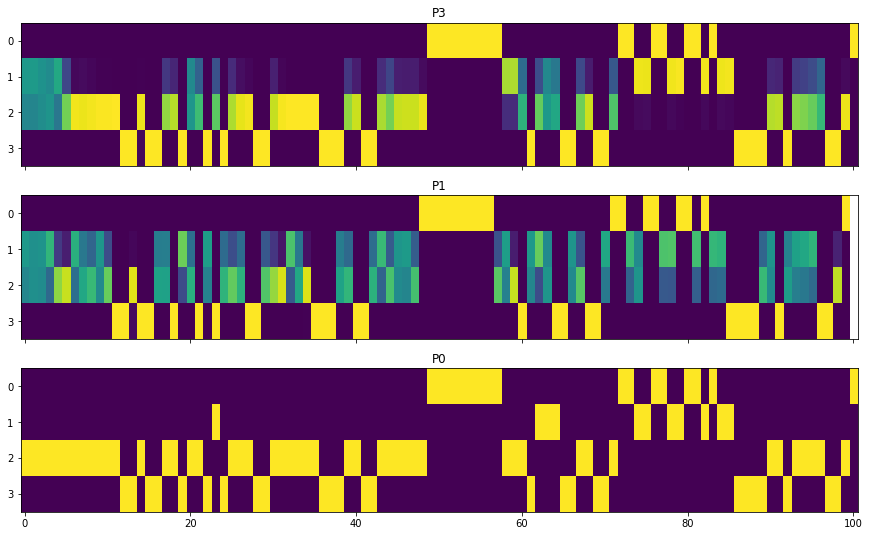

In [365]:
f, axarr = plt.subplots(3, sharex=True,figsize=(15,9))
axarr[0].imshow(np.array(P3), aspect='auto', interpolation='nearest')
axarr[0].set_title('P3')
axarr[1].imshow(np.array(P1), aspect='auto', interpolation='nearest')
axarr[1].set_title('P1')
axarr[2].imshow(np.array(P0), aspect='auto', interpolation='nearest')
axarr[2].set_title('P0')

*Comments: Basically speaking, when we considered temporal dependencies(P3), the model performances is better than the not considered one(P1). As shown above, P3 is much darker in the second row than P1, and these places are exactly no-exist one (P0). The reason is also obvious. Every $z_t$ is obtained from the previous $x$ and $z$, which can be expressed as $x_{1:t}$ here.
*